# Pymaceuticals Inc.
---

### Analysis

The purpose of this study is to compare the effectiveness of ten drug regimens against tumor growth in 249 mice over a period of 45 days and to highlight the effect of the drug Capomulin on tumor growth against the other drug regimens.

The following are the overall conclusions:

1)When comparing the average tumor volume against each drug regimen it is evident that Ramicane and capamulin had the lowest median tumor volume  which were 40.67 and 41.55 respectively and the highest median tumor volume observed was from the drug Ketapril.

2)In comparing the total number of observations against drug regimens we can see from the bar plots that the highest number of total observations were for Capamulin and Ramicane which suggests that their lower median values may be attributable to this higher number of observations as well as effectiveness of the drug when comparing to the other drugs.

3)Of the population of mice studied 51% were male and 49% were female making it slightly skewed towards a male population.

4)When comparing the final tumor volume against four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin we can see from the box plot diagram that the median final volume for Capomulin and Ramicane fall closer to the same range approximcately between 35mm3 and 40 mm3 with Ramicane slightly lower than Capomulin. On the Contrary, Infubinol and Ceftamin had a higher median for the final volume which were closer to 60 mm3 and Infubinol had 31 outliers that fell below the lower quartile. 

5)From the line graph analysis for tumor volume vs time for a single mouse treated with Capomulin we can see that that there is a negative correlation between tumore volume and time which indicates that the tumor volume decreases as time increases which shows that Capomulin could be an effective drug in treating this type of tumor.

6)The mouse weight vs tumor volume scatter plots shows that there is a positive linear correlation between mouse weight and tumor volume with a correlation coefficientof 0.84 indicating a higher tumor volume as mouse weight increases.


 

In [44]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy import stats


import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data_df = pd.merge(study_results, mouse_metadata, how = 'left', on='Mouse ID')

# Display the data table for preview
combined_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [45]:
# Checking the number of mice.
len(combined_data_df["Mouse ID"].unique())

249

In [46]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data_df[combined_data_df.duplicated(subset=["Mouse ID","Timepoint"], keep=False)]
duplicate_mice_ID= duplicate_mice["Mouse ID"].unique()
duplicate_mice_ID

array(['g989'], dtype=object)

In [47]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mouse_all_data=combined_data_df[combined_data_df['Mouse ID']=='g989']
duplicate_mouse_all_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [48]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse_data=combined_data_df[combined_data_df['Mouse ID'] !='g989']
cleaned_mouse_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [49]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_mouse_data['Mouse ID'].unique())

248

## Summary Statistics

In [50]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mouse_data_mean = cleaned_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
mouse_data_median = cleaned_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
mouse_data_var = cleaned_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
mouse_data_std_dev = cleaned_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
mouse_data_std_err = cleaned_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_statistics_table = pd.DataFrame({
    'Mean Tumor Volume':mouse_data_mean ,
    'Median Tumor Volume': mouse_data_median,
    'Tumor Volume Variance': mouse_data_var,
    'Tumor Volume Std. Dev': mouse_data_std_dev,
    'Tumor Volume Std. Err.': mouse_data_std_err 
})

summary_statistics_table



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [51]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_stats_agg_method = cleaned_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean', 
    median='median',
    var='var',
    std='std',
    sem='sem'
)
summary_stats_agg_method


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

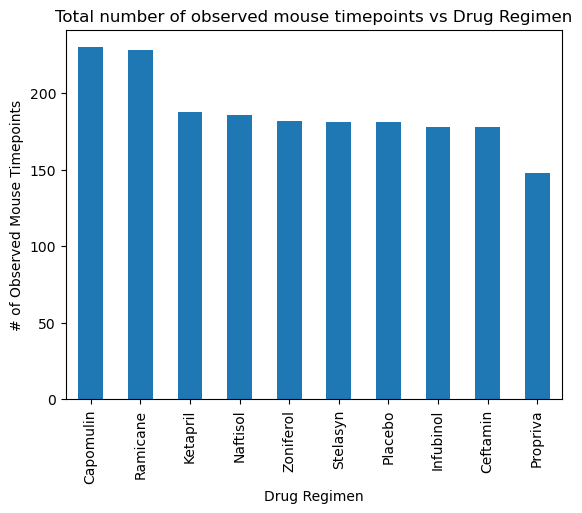

In [67]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#The total count for each drug regimen
ttl_drug_counts = cleaned_mouse_data['Drug Regimen'].value_counts()
ttl_drug_counts_pandas = ttl_drug_counts.plot.bar(x= 'Drug Regimen', y ='Number of Mice', rot = 90, legend = False, title = 'Total number of observed mouse timepoints vs Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')



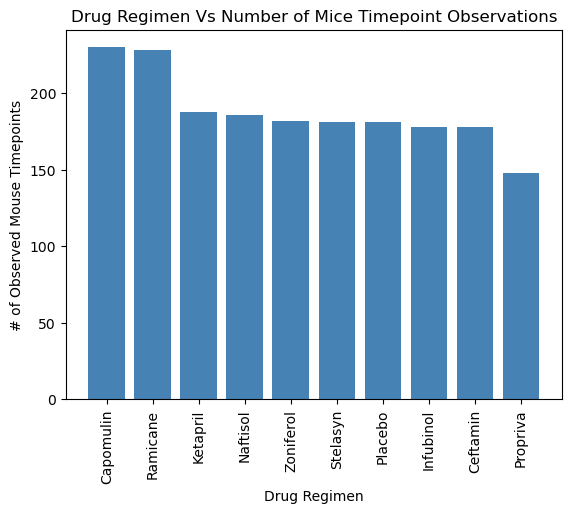

In [68]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
ttl_drug_counts = cleaned_mouse_data['Drug Regimen'].value_counts()
#Get drug types
drugs_xaxis = ttl_drug_counts.index
#Get counts for drugs
mice_counts= ttl_drug_counts.values
x_axis = np.arange(len(drugs_xaxis))

plt.bar(x_axis, mice_counts, color='steelblue', align='center')
plt.xticks(x_axis, drugs_xaxis, rotation='vertical')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('Drug Regimen Vs Number of Mice Timepoint Observations')
plt.show()



Text(0, 0.5, 'Sex')

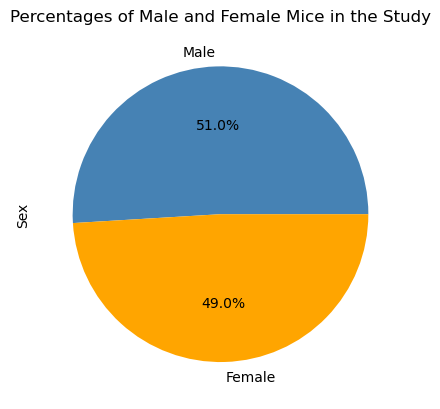

In [54]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_sex_counts= cleaned_mouse_data['Sex'].value_counts()
labels = ['Male', 'Female']
colors = ['steelblue','orange']
mice_sex_counts.plot(kind='pie', colors=colors, labels = labels, autopct='%0.1f%%')
plt.title('Percentages of Male and Female Mice in the Study')

plt.ylabel("Sex")

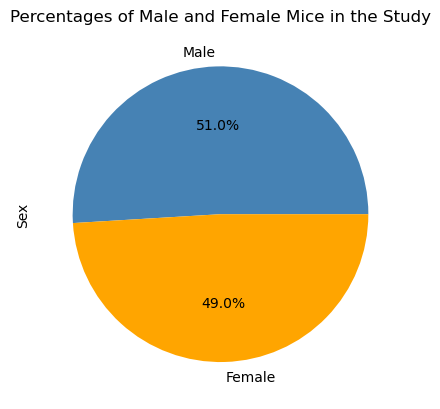

In [55]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_sex_counts = cleaned_mouse_data['Sex'].value_counts()
countspyplot = mouse_sex_counts.values
colors = ['steelblue', 'orange']
labels = ['Male', 'Female']

plt.pie(countspyplot, colors=colors, labels=labels, autopct="%0.1f%%")
plt.ylabel("Sex")
plt.title('Percentages of Male and Female Mice in the Study')
plt.show()


## Quartiles, Outliers and Boxplots

In [56]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

max_time = cleaned_mouse_data.groupby('Mouse ID')['Timepoint'].max().reset_index()
max_time
# display max_time

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

tumor_volume = max_time[['Mouse ID', 'Timepoint']].merge(cleaned_mouse_data, on = ['Mouse ID','Timepoint'], how = "left")

#tumor_volume = pd.merge(max_time, regimen_df, how='left', on=['Mouse ID','Timepoint']) 
tumor_volume

final_tumor_Volume = tumor_volume[['Drug Regimen', 'Mouse ID', 'Tumor Volume (mm3)']]
final_tumor_df = final_tumor_Volume.rename(columns = {'Tumor Volume (mm3)' : 'Final Tumor Volume (mm3)'})
final_tumor_df

#display tumor final volume




,Drug Regimen,Mouse ID,Final Tumor Volume (mm3)
0,Infubinol,a203,67.973419
1,Infubinol,a251,65.525743
2,Placebo,a262,70.717621
3,Ceftamin,a275,62.999356
4,Stelasyn,a366,63.440686
...,...,...,...
243,Propriva,z435,48.710661
244,Ramicane,z578,30.638696
245,Infubinol,z581,62.754451
246,Naftisol,z795,65.741070


In [57]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin','Ramicane','Infubinol','Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []
outlier = []


# Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    tumor_vol = final_tumor_df.loc[final_tumor_df['Drug Regimen'] == treatment]['Final Tumor Volume (mm3)']
    tumor_volume.append(tumor_vol)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#Calculating the quartiles
    quartiles = tumor_vol.quantile([0.25, 0.75])

    lowerQ = quartiles[0.25]
    upperQ = quartiles[0.75]
    IQR = upperQ-lowerQ
    IQR

#calculating bounds
    lower_bound = lowerQ - (1.5 * IQR)
    upper_bound = upperQ + (1.5 * IQR)

#calculating outliers using upper and lower bounds

    outliers = tumor_vol.loc[(tumor_vol > upper_bound) | (tumor_vol < lower_bound)]

    print(f"{treatment}'s potential outliers: {outliers}")
    outlier.append(outliers)




Capomulin's potential outliers: Series([], Name: Final Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Final Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Final Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Final Tumor Volume (mm3), dtype: float64)


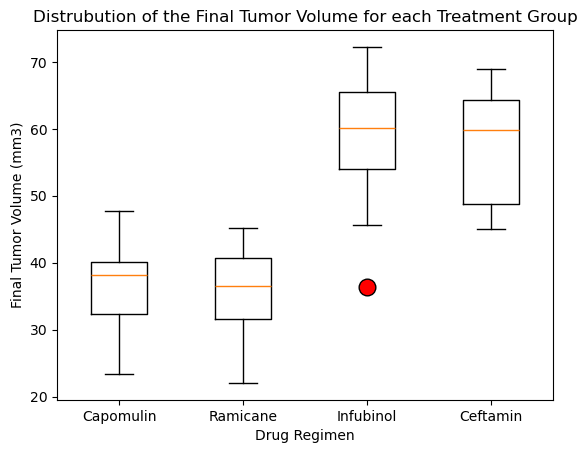

In [58]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='black')

plt.boxplot([tumor_volume[0], tumor_volume[1], tumor_volume[2], tumor_volume[3]], labels = treatments, flierprops = flierprops)
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Distrubution of the Final Tumor Volume for each Treatment Group')

plt.show()


## Line and Scatter Plots

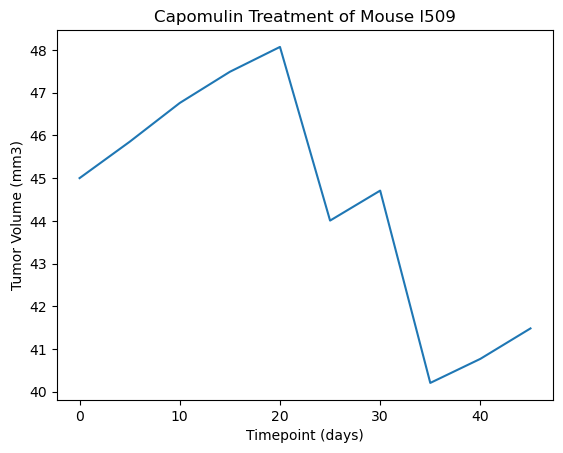

In [59]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin = cleaned_mouse_data[cleaned_mouse_data['Drug Regimen'] == 'Capomulin']
capomulin_line_graph = capomulin[capomulin['Mouse ID'] == 'l509'][['Timepoint', 'Tumor Volume (mm3)']]


plt.plot(capomulin_line_graph['Timepoint'], capomulin_line_graph['Tumor Volume (mm3)'])
plt.title('Capomulin Treatment of Mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()


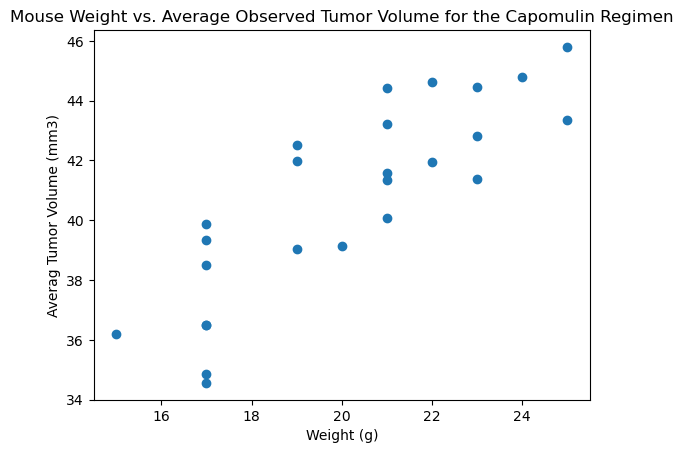

In [60]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_vol_capomulin = capomulin.groupby('Mouse ID').mean(numeric_only = True)[['Tumor Volume (mm3)', 'Weight (g)']]

x_values = avg_vol_capomulin['Weight (g)']
y_values = avg_vol_capomulin['Tumor Volume (mm3)']

plt.scatter(x_values, y_values)

plt.xlabel('Weight (g)')
plt.ylabel('Averag Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Observed Tumor Volume for the Capomulin Regimen')

plt.show()


## Correlation and Regression

In [61]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(avg_vol_capomulin['Weight (g)'], avg_vol_capomulin['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is: {round(correlation[0], 2)}")

# Perform a linear regression on weight vs. tumor volume, y=mx+b
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(avg_vol_capomulin['Weight (g)'], avg_vol_capomulin['Tumor Volume (mm3)'])

# Get regression values
regress_values = (avg_vol_capomulin['Weight (g)'] * slope) + intercept 

# Create line equation string
line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'


The correlation between mouse weight and the average tumor volume is: 0.84


The r value is: 0.8419363424694721


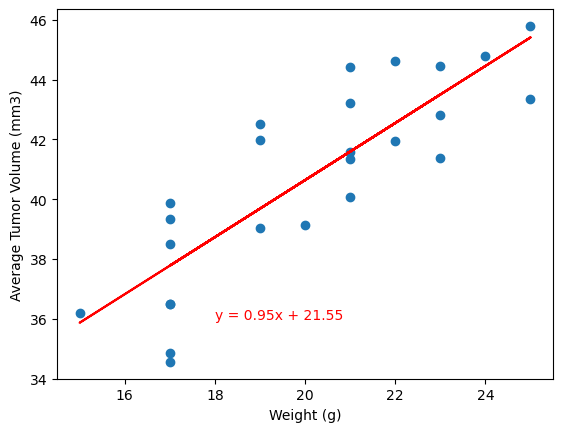

In [62]:
plt.scatter(x =avg_vol_capomulin['Weight (g)'], y = avg_vol_capomulin['Tumor Volume (mm3)'])
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Weight (g)')


# Label plot and annotate the line equation
plt.annotate(line_eq, (18,36), fontsize = 10, color = 'red')

# Print r value
plt.plot(avg_vol_capomulin['Weight (g)'], regress_values, '-r')
print(f'The r value is: {rvalue}')

# Show plot
plt.show()
